<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Environment" data-toc-modified-id="Environment-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Environment</a></span></li></ul></li><li><span><a href="#Main" data-toc-modified-id="Main-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main</a></span><ul class="toc-item"><li><span><a href="#Extract/Inspect-Data" data-toc-modified-id="Extract/Inspect-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extract/Inspect Data</a></span></li><li><span><a href="#Make-Plots" data-toc-modified-id="Make-Plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Make Plots</a></span></li></ul></li></ul></div>

# Preamble

## Import

In [1]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

sns.set(context='poster')

## Functions

In [2]:
def measure(row,measurements=None,explode=None):
    if explode is None:
         measure = [ 
            {
                'num_people': row['num_people'],
                'num_connections': row['num_connections'],
                'size': row['size'],
                'max_memory': row['max_memory'],
                'runtime_total': row['runtime']['total'],
                'runtime_choose': row['runtime']['choose'],
                'runtime_available': row['runtime']['available'] # runtime_available
            } 
        ]
    if explode == 'runtime_choose': 
        measure = [ 
            {
                'num_people': row['num_people'],
                'num_connections': row['num_connections'],
                'size': row['size'],
                'max_memory': row['max_memory'],
                'runtime_total': row['runtime']['total'],
                'runtime_choose': runtime_choose,
                'runtime_available': row['runtime']['available'] # runtime_available
            } 
            # for runtime_available in row['runtime']['available'] 
            for runtime_choose in row['runtime']['choose']
        ]
    if explode == 'runtime_available':
        measure = [ 
            {
                'num_people': row['num_people'],
                'num_connections': row['num_connections'],
                'size': row['size'],
                'max_memory': row['max_memory'],
                'runtime_total': row['runtime']['total'],
                'runtime_choose': row['runtime']['choose'],
                'runtime_available': runtime_available
            } 
            for runtime_available in row['runtime']['available']
        ]
    
    measurements.append(measure)

In [3]:
def extract_data(path=None,explode=None):
    # Load experiment results
    with open(path,'rb') as _file:
        data = pkl.load(_file)

    # Load into data frame
    data = pd.DataFrame(data)

    # Extract measurements
    measurements = []
    _ = data.apply(measure,
                   measurements=measurements,
                   explode=explode,
                   axis=1)

    measurements = list(itertools.chain(*measurements))

    data = pd.DataFrame(measurements)
    
    return data

In [4]:
def make_fig(figsize=None):
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    return fig, ax

In [5]:
def make_plot(path=None,runtime='runtime_total',figsize=(20,12)):
    if runtime == 'runtime_total':
        explode = None
    else:
        explode = runtime
        
    data = extract_data(path=path,explode=explode)
    fig, ax = make_fig(figsize=figsize)
    sns.barplot(x='num_people',
                y=runtime,
                hue='num_connections',
                data=data,ax=ax)

In [6]:
def make_mem_plot(path=None):
    data = extract_data(path=path)
    data['max_memory'] = data['max_memory']/1024
    fig, ax = make_fig(figsize=(20,12))
    sns.barplot(x='num_people',
                y='max_memory',
                hue='num_connections',
                data=data,
                ax=ax)
    ax.set(ylabel='Max Memory [MB]')

In [7]:
def make_size_plot(path=None):
    data = extract_data(path=path)
    fig, ax = make_fig(figsize=(20,12))
    data['size'] = data['size']/1024**2
    sns.barplot(x='num_people',
                y='size',
                hue='num_connections',
                data=data,
                ax=ax)
    ax.set(ylabel='Connections Dataframe Size [MB]')

## Environment

In [8]:
path = 'results_1587500745.pkl'

# Main

## Extract/Inspect Data

In [9]:
data = extract_data(path=path)

In [10]:
%%time
data.head()

CPU times: user 452 µs, sys: 128 µs, total: 580 µs
Wall time: 590 µs


num_people  num_connections   size  max_memory  runtime_total  \
0         100                5  12960       58220      17.306828   
1         100               10  19360       58536      30.976888   
2         100               15  19360       58536      17.965294   
3         100               20  26560       58796       4.613655   
4         100               25  27360       58796      20.518376   

                                      runtime_choose  \
0  [0.24772310256958008, 0.2857677936553955, 0.28...   
1  [0.5315847396850586, 0.5295836925506592, 0.529...   
2  [0.7340540885925293, 0.7756216526031494, 0.738...   
3  [0.08024764060974121, 0.07496786117553711, 0.0...   
4  [0.14246463775634766, 0.15155887603759766, 0.1...   

                                   runtime_available  
0  [0.08094668388366699, 0.04005002975463867, 0.0...  
1  [0.04419422149658203, 0.03970766067504883, 0.0...  
2  [0.0275876522064209, 0.0026993751525878906, 0....  
3  [0.002889394760131836, 0.002312183380126953, 0...  
4  [0.0030586719512939453, 0.0023610591888427734,...

You can explode `runtime_choose` or `runtime_avilable`, but I would not explode both columns. That operation takes a long time.

In [11]:
%%time
data2 = extract_data(path=path,explode='runtime_choose')

CPU times: user 14.7 s, sys: 180 ms, total: 14.9 s
Wall time: 15.4 s


In [12]:
data2.head()

num_people  num_connections   size  max_memory  runtime_total  \
0         100                5  12960       58220      17.306828   
1         100                5  12960       58220      17.306828   
2         100                5  12960       58220      17.306828   
3         100                5  12960       58220      17.306828   
4         100                5  12960       58220      17.306828   

   runtime_choose                                  runtime_available  
0        0.247723  [0.08094668388366699, 0.04005002975463867, 0.0...  
1        0.285768  [0.08094668388366699, 0.04005002975463867, 0.0...  
2        0.281433  [0.08094668388366699, 0.04005002975463867, 0.0...  
3        0.206448  [0.08094668388366699, 0.04005002975463867, 0.0...  
4        0.202640  [0.08094668388366699, 0.04005002975463867, 0.0...

## Make Plots

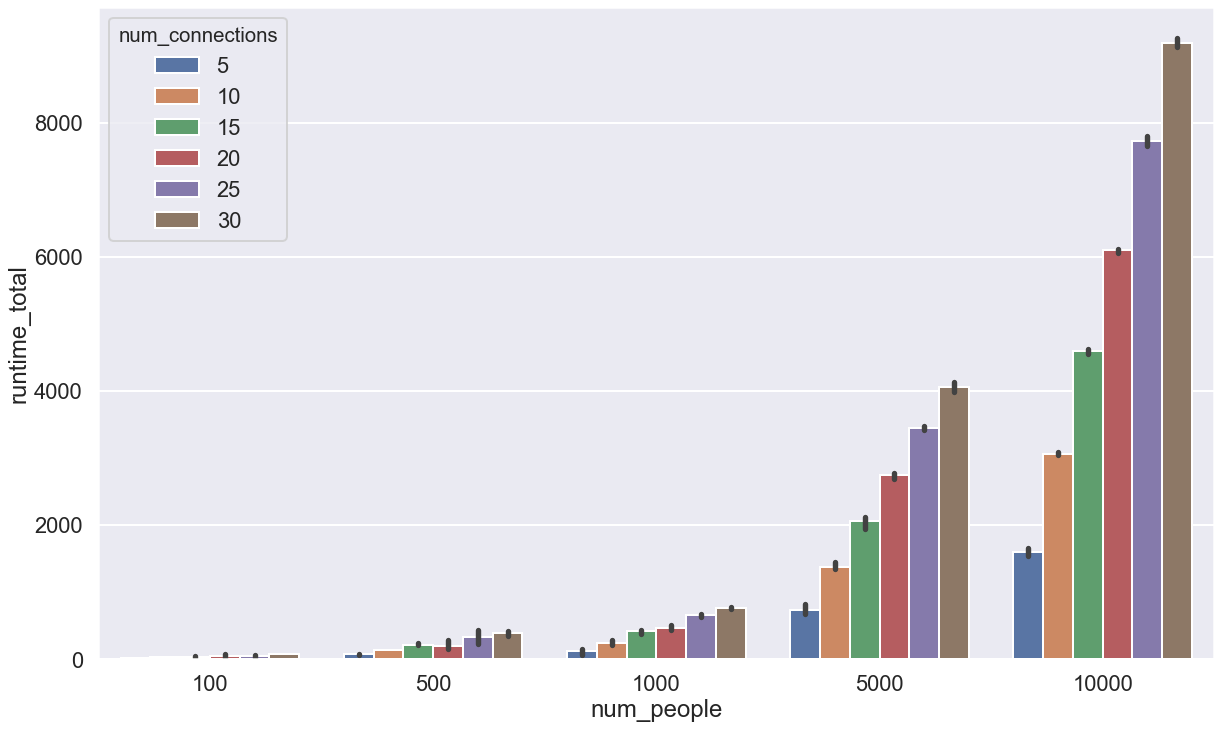

In [13]:
make_plot(path=path)

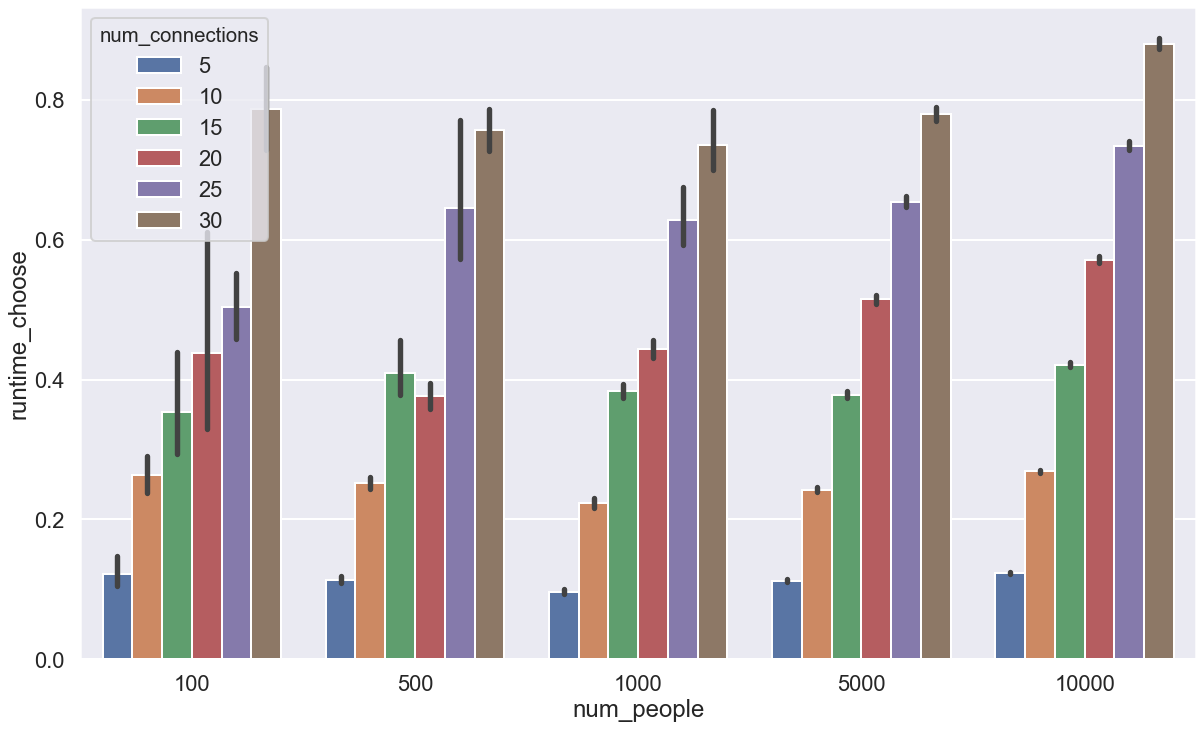

In [14]:
make_plot(path=path,runtime='runtime_choose')

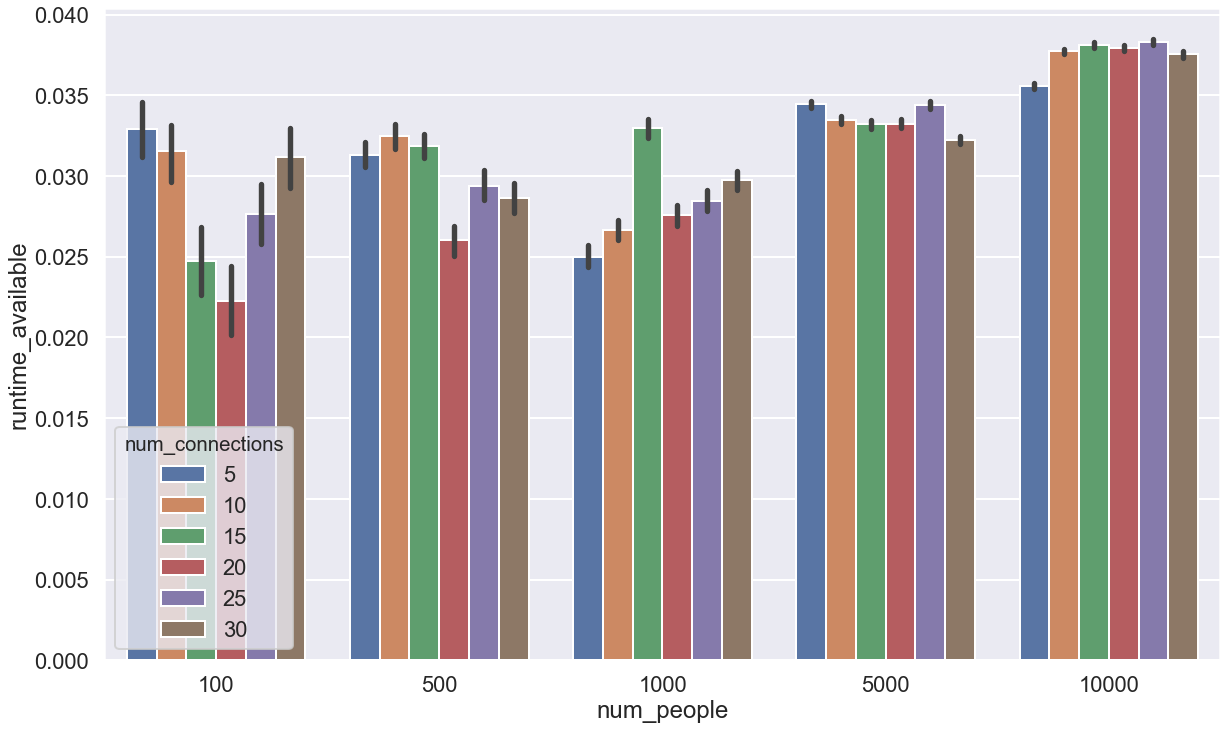

In [15]:
make_plot(path=path,runtime='runtime_available')

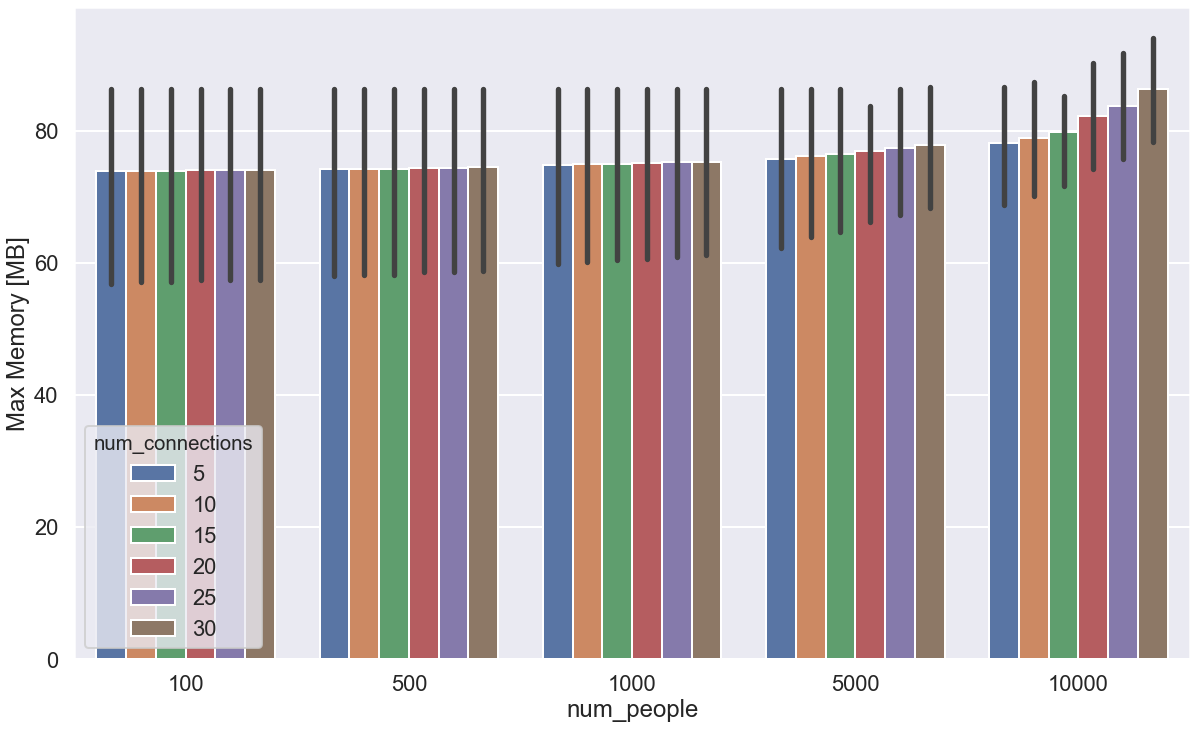

In [16]:
make_mem_plot(path=path)

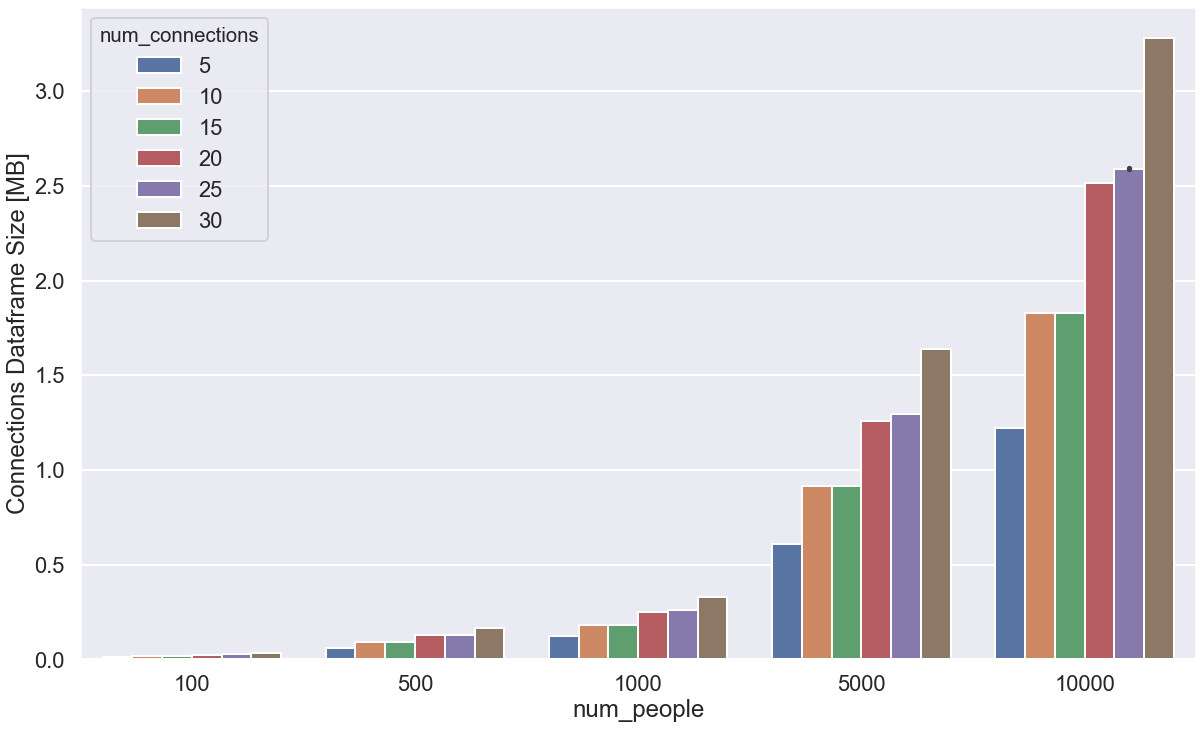

In [17]:
make_size_plot(path=path)